Exercise
Plot the loss function as a function of the epochs.

Hint
You can access the loss function values with the command:

model_history.history['loss']

Using TensorFlow backend.


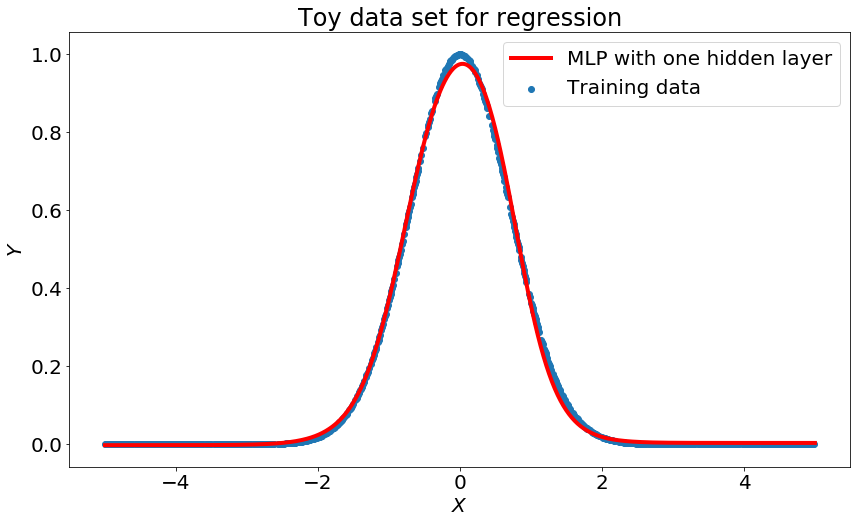

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras import models
from keras import layers

from sklearn.model_selection import train_test_split

n_samples = 1000 # set the number of samples to take for each toy dataset
test_size = 0.3 # set the proportion of toy data to hold out for testing
random_seed = 1 # set the random seed to make the experiment reproducible 
np.random.seed(random_seed)

# define a function
f = lambda x: np.exp(-x * x)
X = np.random.permutation(np.linspace(-5, 5, n_samples)) # choose some points from the function - this is our toy dataset 
Y = f(X)

# create training and testing data from this set of points
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size)

H = 2 # number of nodes in the layer
input_dim = 1 # input dimension: just xc

model = models.Sequential() # create sequential multi-layer perceptron

# layer 0, our hidden layer
model.add(layers.Dense(H, input_dim=input_dim, 
                kernel_initializer='normal', 
                activation='sigmoid')) 
# layer 1
model.add(layers.Dense(1, kernel_initializer='normal', 
                activation='linear'))

# configure the model
model.compile(loss='mean_squared_error', optimizer='adam')

# fit the model
model_history = model.fit(X_train, Y_train, batch_size=100, epochs=1000, verbose=0)

# use our model to predict in the range we want
X_range = np.linspace(-5, 5, 1000)
y_pred = model.predict(X_range)

fig, ax = plt.subplots(1, 1, figsize=(14,8))
ax.scatter(X_train, Y_train, label='Training data')
ax.plot(X_range, y_pred, lw=4, color='r', label='MLP with one hidden layer')
ax.set_xlabel(r'$X$', fontsize=20)
ax.set_ylabel(r'$Y$', fontsize=20)
ax.set_title('Toy data set for regression', fontsize=24)
ax.tick_params(labelsize=20)

ax.legend(loc=1, fontsize=20)

plt.show()

In [2]:
model_history.history['loss']

[0.11373090531144824,
 0.11002986878156662,
 0.10684158014399665,
 0.10380352182047707,
 0.10138902493885585,
 0.09949911598648344,
 0.09769440868071147,
 0.09656177461147308,
 0.09559039452246257,
 0.0948641789810998,
 0.09443919360637665,
 0.09398303500243596,
 0.09376037972314018,
 0.09360302878277642,
 0.0934850669332913,
 0.0934192453111921,
 0.09336796615804945,
 0.09333465567656926,
 0.09333823727709907,
 0.09331544807979039,
 0.09331497124263219,
 0.09331481478043965,
 0.0933110990694591,
 0.09332308705363955,
 0.09330926835536957,
 0.09331243804522923,
 0.09331361949443817,
 0.09330905015979495,
 0.09330930986574718,
 0.09332125154989106,
 0.09331708295004708,
 0.09332618649516787,
 0.09330989526850837,
 0.09331290743180684,
 0.09331441244908742,
 0.09331794934613365,
 0.09330904696668897,
 0.09331166637795311,
 0.09331193353448596,
 0.09331427088805608,
 0.09330996445247106,
 0.09331178132976804,
 0.09331369612898145,
 0.09331346090350832,
 0.09331686581884112,
 0.09330966642

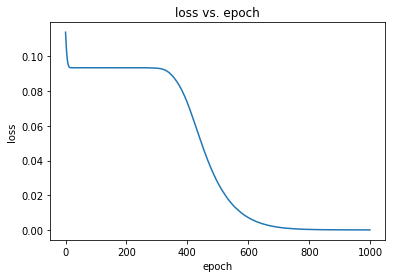

In [3]:
import matplotlib.pyplot as plt
plt.plot(model_history.history['loss'])
plt.title("loss vs. epoch")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.show()
